In [47]:
import os
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [48]:

root = r"D:\stl10_data"

In [49]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),  # STL-10の平均
                         (0.229, 0.224, 0.225))  # STL-10の標準偏差
])

In [50]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # グレースケールに変換（チャンネル数を1に）
    transforms.ToTensor(),
    transforms.Normalize((0), (1))  # グレースケール画像用の平均と標準偏差
])

In [51]:
# STL-10のデータセット
stl10_train = datasets.STL10(root=root, split='train', download=True, transform=transform)
stl10_test = datasets.STL10(root=root, split='test', download=True, transform=transform)

# データローダ
train_dataloader = DataLoader(stl10_train, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
test_dataloader = DataLoader(stl10_test, batch_size=64, shuffle=False, num_workers=4, pin_memory=True)

Files already downloaded and verified
Files already downloaded and verified


In [52]:
def show_stl10_images(images, labels, title):
    class_names = ['airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck']
    images = images.numpy()
    images = np.transpose(images, (0, 2, 3, 1))  # チャンネルを最後に移動
    
    # 正規化を元に戻す（STL-10の平均と標準偏差を使用）
    '''mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    images = images * std + mean'''
    images = np.clip(images, 0, 1)  # ピクセル値を[0, 1]にクリップ
    
    # 図の設定
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    for i in range(3):  # 最初の3枚の画像を表示
        img = images[i]
        label = labels[i].item()
        ax = axes[i]
        ax.imshow(img)
        ax.set_title(class_names[label])
        ax.axis('off')
    
    plt.suptitle(title)
    plt.show()

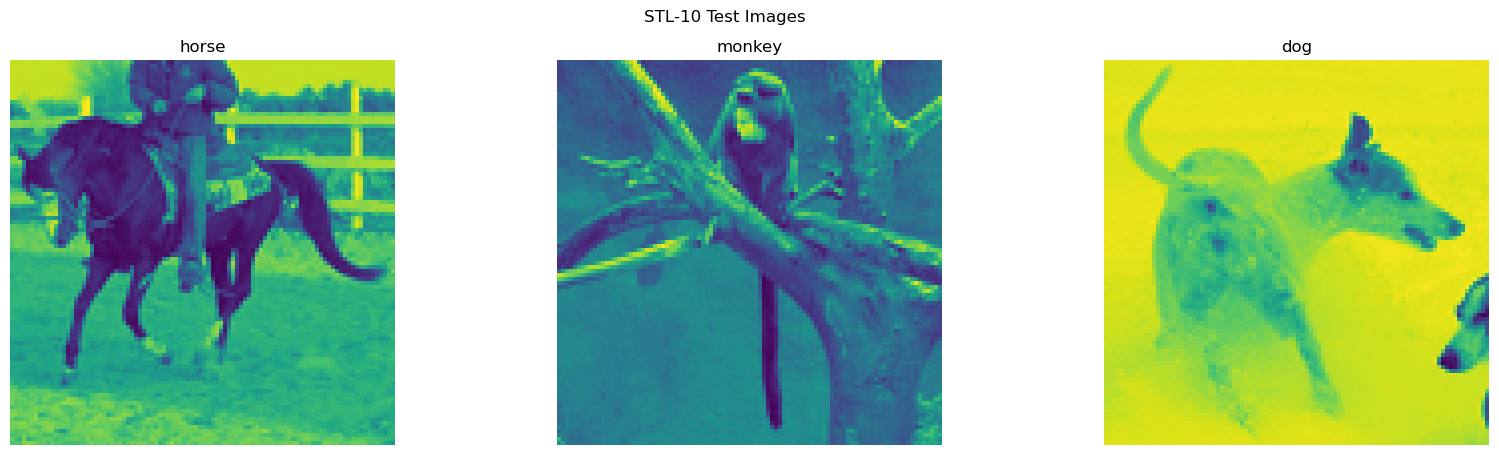

Batch shape: torch.Size([64, 1, 96, 96])


In [54]:
# テストデータから画像を取得し表示
for images, labels in test_dataloader:
    show_stl10_images(images, labels, title="STL-10 Test Images")
    print(f"Batch shape: {images.shape}")
    break